# Import dataset global

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
# from bokeh.models import Panel, Tabs   #Bokeh 2.x 
from bokeh.models import TabPanel, Tabs  #Bokeh 3.x
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import curdoc

pd.options.display.max_columns = 60
pd.options.display.max_rows = 20

# path = '/.../#2_Projet/DS_v0/'
path = "I:/PYFILES/Accidents/"

######
years = ['2018f', '2019', '2020',  '2021']
s_df = ["carcteristiques","lieux-","vehicules-","usagers-"]
dff = pd.DataFrame()
k=0
hows='inner'
######

for year in years:
    df_1 =   pd.read_csv(path + "caracteristiques-" + year + '.csv', delimiter=';')
    df_2  =  pd.read_csv(path + "lieux-" + year + '.csv', delimiter=';')
#     df_2  =  pd.read_csv(path + "lieux-" + year + '.csv', delimiter=';', dtype={'catr': str})
    df_3  =  pd.read_csv(path + "vehicules-" + year + '.csv', delimiter=';')
    df_4 =   pd.read_csv(path + "usagers-" + year + '.csv', delimiter=';')

    merged_df = pd.merge(df_1, df_2,on=['Num_Acc'], how=hows)
    merged_df = pd.merge(merged_df, df_3,on=['Num_Acc'], how=hows)
    if year=='2018f':
        df = pd.merge(merged_df, df_4,on=['Num_Acc','num_veh'], how=hows)
    else:
        df = pd.merge(merged_df, df_4,on=['Num_Acc','num_veh','id_vehicule'], how=hows)

    dff = pd.concat([dff, df],ignore_index=True)
    print(year, df.shape)
    k=k+df.shape[0]

print("Total dataset 2018-2021 : ",dff.shape)

C:\Users\Jerome\AppData\Local\Temp\ipykernel_21612\518337178.py:30: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2  =  pd.read_csv(path + "lieux-" + year + '.csv', delimiter=';')


2018f (130169, 51)
2019 (132977, 54)
2020 (105295, 54)
2021 (129153, 54)
Total dataset 2018-2021 :  (497594, 57)


In [2]:
# Colonnes

col_veh   = ['Num_Acc','senc','catv','occutc','obs','obsm','choc', 'manv', 'num_veh', 'id_vehicule', 'motor']
col_carac = ['Num_Acc','an','mois','jour','hrmn','lum','agg','int','atm','col','com','adr','gps','lat','long','dep']
col_lieu  = ['Num_Acc','catr','voie','v1','v2','circ','nbv','pr','pr1','vosp','prof','plan','lartpc','larrout','surf',
             'infra','situ','env1','vma']
col_usag  = ['Num_Acc','place','catu','grav','sexe','trajet','secu','locp','actp','etatp','an_nais','num_veh',
             'id_vehicule','secu1','secu2','secu3']

## Dataset "Lieux"

In [3]:
df_lieux = dff[['Num_Acc','an','catr','voie','v1','v2','circ','nbv','pr','pr1','vosp','prof','plan','lartpc','larrout','surf',
             'infra','situ','env1','vma','grav']].copy() # on travaille sur une copie. on conserve 'an' pour étudier 'vma'
df_lieux.head()

,Num_Acc,an,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma,grav
0,201800000001,18,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,3
1,201800000001,18,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,1
2,201800000002,18,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,1
3,201800000002,18,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,4
4,201800000003,18,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0,NaN,3


In [4]:
df_lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497594 entries, 0 to 497593
Data columns (total 21 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  497594 non-null  int64  
 1   an       497594 non-null  int64  
 2   catr     497594 non-null  int64  
 3   voie     413492 non-null  object 
 4   v1       343182 non-null  float64
 5   v2       33594 non-null   object 
 6   circ     496665 non-null  float64
 7   nbv      496422 non-null  float64
 8   pr       464226 non-null  object 
 9   pr1      463620 non-null  object 
 10  vosp     496378 non-null  float64
 11  prof     496587 non-null  float64
 12  plan     496621 non-null  float64
 13  lartpc   29731 non-null   object 
 14  larrout  264943 non-null  object 
 15  surf     496568 non-null  float64
 16  infra    496519 non-null  float64
 17  situ     496460 non-null  float64
 18  env1     129110 non-null  float64
 19  vma      367425 non-null  float64
 20  grav     497594 non-null  

In [5]:
# Regardons les valeurs de chaque colonne
for col in df_lieux.columns:
    print(col, ": ", df_lieux[col].unique())

Num_Acc :  [201800000001 201800000002 201800000003 ... 202100056516 202100056517
 202100056518]
an :  [  18 2019 2020 2021]
catr :  [3 4 2 9 6 1 5 7]
voie :  ['41' '39' nan ... 'RT209' 'Boulevard Alexandra David-Neel' 'RD820']
v1 :  [nan  2.  3.  0. -1.]
v2 :  ['C' 'D' nan 'A' 'R' 'E' 'V' 'L' 'B' 'f' 'N' 'T' 'X' 'G' 'F' 'H' 'K' '4'
 '1' '2' 'J' 'M' 'a' 'Z' '5' '9' 'c' 'S' '6' '3' '0' 'P' 'I' 'e' 'n' 'b'
 'z' 'Y' 'W' 'w' 'y' '7' '8' 'INT' ' -' 'EXT' 'U' 'O' '15' 'II' '1A' 'IV'
 ' D' 'A1' 'CD' 'VC' 'BIS' 'DV' 'AEROPORT' '.' 'ILES' '34']
circ :  [ 2.  1.  0.  3. nan  4. -1.]
nbv :  [ 2.  1.  4. nan  3.  0.  5.  6.  7. 10.  8. 13.  9. 12. 11. -1.]
pr :  [nan 16.0 1.0 ... '663' '466' '5220']
pr1 :  [nan 500.0 670.0 ... '1153' '1267' '1423']
vosp :  [ 0.  2.  1.  3. nan -1.]
prof :  [ 1.  2. nan  3.  4.  0. -1.]
plan :  [ 3.  2.  1. nan  4.  0. -1.]
lartpc :  [nan 10.0 0.0 15.0 20.0 50.0 25.0 30.0 4.0 65.0 714.0 6.0 7.0 58.0 5.0
 110.0 45.0 48.0 32.0 70.0 400.0 1.0 60.0 40.0 35.0 18.0 8.0 46

In [6]:
# Informations pour chaques colonnes

# Num_Acc = clef unique identifiant les accidents
# an = année
# catr = catégorie de route
# voie = numéro et nom de voie > ne sera pas utile pour déterminer la gravité. Qualité à vérifier
# v1 = indice numérique de la route > ne sera pas utile pour déterminer la gravité. Qualité à vérifier
# v2 = indice alphanumérique de la route > ne sera pas utile pour déterminer la gravité. Qualité à vérifier
# circ = Régime de circulation. On a des nan et des -1, je remplacerai les nan par -1. Qualité à vérifier
# nbv = Nombre total de voies de circulation, je remplacerai bien les nan par -1. Qualité à vérifier car on a jusqu'à 13 voies
#       or on est en France ...
# vosp = existence d’une voie réservée, même si l’accident a eulieu ou non sur cette voie. Je remplacerai bien les nan par -1. Qualité à vérifier
# prof = Profil en long décrit la déclivité de la route à l'endroit de l'accident, je remplacerai les nan par -1. Qualité à vérifier
# pr et pr1 = points de rattachement, ce sont les bornes kilométriques posées par le gestionnaire du réseau. 
#       Cela ne sera pas utile pour notre étude, et c'est moins pratique que des adresses ou coordonnées GPS > à supprimer
# plan = Tracé en plan, cad si cela est en courbe ou en partie rectiligne. Qualité à vérifier, variable à simplifier si on garde.
# lartpc = largeur du terre plein central s'il existe. Qualité à vérifier (mauvaise) et unités non précisées 
#          variable continue non quantifiée. A supprimer je pense
# arrout = Largeur de la chaussée affectée à la circulation des véhicules. Qualité à vérifier (mauvaise) et unités non précisées
#          variable continue non quantifiée. A supprimer je pense.
# surf = état de la surface, je remplacerai les nan par -1. Qualité à vérifier
# infra = aménagement de l'infrastructure, je remplacerai les nan par -1. Qualité à vérifier
# situ = Situation de l’accident, je remplacerai les nan par -1. Qualité à vérifier
# vma = vitesse maximale autorisée. Qualité (mauvaise) à étudier, intuition de suppression
# grav = gravité de l'accident

# Retravail de la colonne gravité

In [7]:
# Suppression de la gravité -1, non répertoriée, et reclassification
df_lieux = df_lieux.drop(df_lieux[df_lieux['grav'] == -1].index)
df_lieux['grav'] = df_lieux['grav'].replace({1: 'D-Indemne', 2: 'A-Tué', 3: 'B-Hospitalisé', 4: 'C-Léger'})

# Tri de la gravité
grav_order = np.sort(df_lieux['grav'].unique())

In [8]:
# Ajout d'un compteur
df_lieux['count'] = 1 

In [9]:
# Proportions de la variable gravité
# proportions_volume = ...
proportions = df_lieux['grav'].value_counts(normalize=True)
sorted_proportions = proportions.sort_values()
sorted_proportions

A-Tué            0.025906
B-Hospitalisé    0.158556
C-Léger          0.397603
D-Indemne        0.417935
Name: grav, dtype: float64

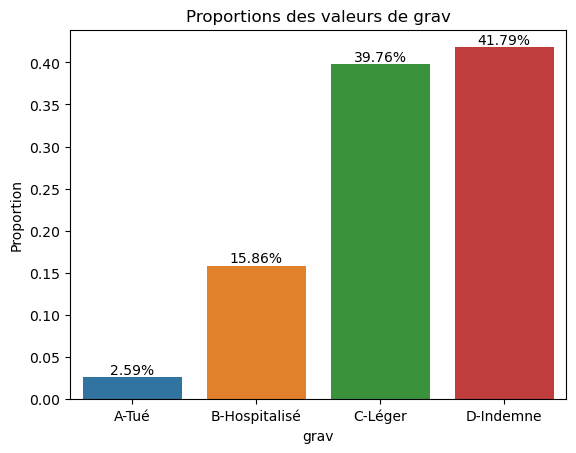

In [10]:
ax = sns.barplot(x=proportions.index, y=proportions.values, order=grav_order)
plt.xlabel('grav')
plt.ylabel('Proportion')
plt.title('Proportions des valeurs de grav')

# Ajouter les valeurs de chaque colonne
for i, val in enumerate(sorted_proportions.values):
    ax.text(i, val, f'{val:.2%}', ha='center', va='bottom')
    
plt.show()

## Etude des valeurs nan pour les Lieux

In [11]:
pd.options.display.max_rows = 25

print("\nTaux NaN triés par ordre décroissant:")
nan_sort = df_lieux.isna().mean().sort_values(ascending=False)*100
print(nan_sort.round(2).apply(lambda x: f"{x:.2f}%"))


Taux NaN triés par ordre décroissant:
lartpc     94.02%
v2         93.25%
env1       74.05%
larrout    46.76%
v1         31.04%
vma        26.16%
voie       16.90%
pr1         6.83%
pr          6.71%
vosp        0.24%
nbv         0.24%
situ        0.23%
infra       0.22%
surf        0.21%
prof        0.20%
plan        0.20%
circ        0.19%
grav        0.00%
Num_Acc     0.00%
an          0.00%
catr        0.00%
count       0.00%
dtype: object


In [12]:
# Suppression des colonnes de mauvaise qualité ou non pertinentes (pr, pr1)
# df_lieux.drop(['voie', 'v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout', 'vma'], axis=1, inplace=True)
df_lieux.drop(['voie', 'v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout', 'env1'], axis=1, inplace=True)

In [13]:
df_lieux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497534 entries, 0 to 497593
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  497534 non-null  int64  
 1   an       497534 non-null  int64  
 2   catr     497534 non-null  int64  
 3   circ     496605 non-null  float64
 4   nbv      496362 non-null  float64
 5   vosp     496318 non-null  float64
 6   prof     496527 non-null  float64
 7   plan     496561 non-null  float64
 8   surf     496508 non-null  float64
 9   infra    496459 non-null  float64
 10  situ     496400 non-null  float64
 11  vma      367365 non-null  float64
 12  grav     497534 non-null  object 
 13  count    497534 non-null  int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 56.9+ MB


## Etude des colonnes unes à unes

In [14]:
# catr = Catégorie de route :
# 1 – Autoroute
# 2 – Route nationale
# 3 – Route Départementale
# 4 – Voie Communales
# 5 – Hors réseau public
# 6 – Parc de stationnement ouvert à la circulation publique
# 7 – Routes de métropole urbaine
# 9 – autre

# Compte tenu des résultats ci-dessous on regroupe les catégories 5 à 9 en autre = 5

SyntaxError: invalid character '–' (U+2013) (2274906475.py, line 2)

Valeurs triées de la variable 'catr': [1 2 3 4 5 6 7 9]


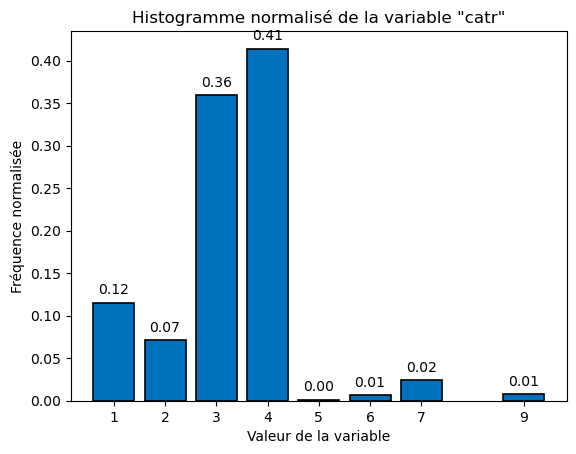

In [15]:
# Etude de la colonne : catr = catégories de route

catr_values = df_lieux['catr'].unique()
catr_values.sort()
print(f"Valeurs triées de la variable 'catr': {catr_values}")

catr_freq = df_lieux['catr'].value_counts(normalize=True)
catr_freq = catr_freq[catr_values]

fig, ax = plt.subplots()
ax.bar(catr_values, catr_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "catr"')

ax.set_xticks(catr_values)
ax.set_xticklabels(catr_values)

for i, freq in enumerate(catr_freq):
    ax.text(catr_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé, on garde

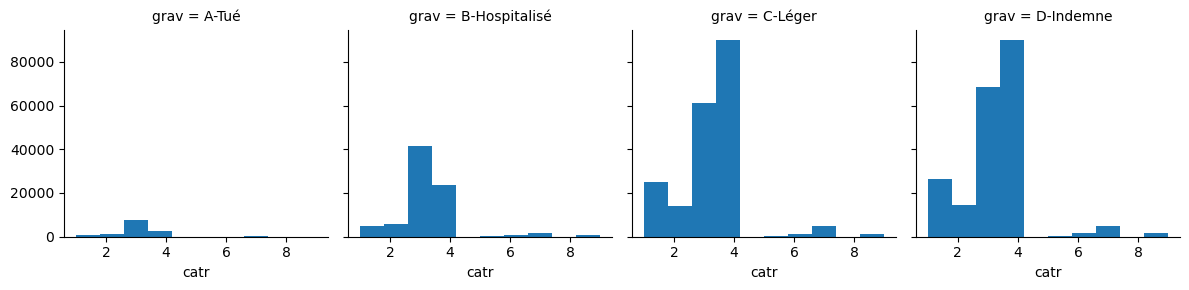

In [16]:
# Répartition en volume
g_catr = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_catr.map(plt.hist, 'catr');


In [ ]:
# # Répartition en %
# sr_catr = df_lieux.groupby(['grav','catr'])['count'].sum() / df_lieux.groupby('catr')['count'].sum()
# sr_catr.head(20)
# df_catr = sr_catr.to_frame()
# df_catr.head(20)

In [ ]:
# # Pour Traitement de preprocessing : regroupement
# df_lieux['catr'].replace([6, 7, 9], 5, inplace=True)

In [2]:
# circ = Régime de circulation :
# -1 – Non renseigné
# 1 – A sens unique
# 2 – Bidirectionnelle
# 3 – A chaussées séparées
# 4 – Avec voies d’affectation variable

# Curieusement nous avons des 0, alors que cela n'apparait pas dans la documentation. Pas de regroupement sur cette variable

Valeurs triées de la variable 'circ': [0. 1. 2. 3. 4.]


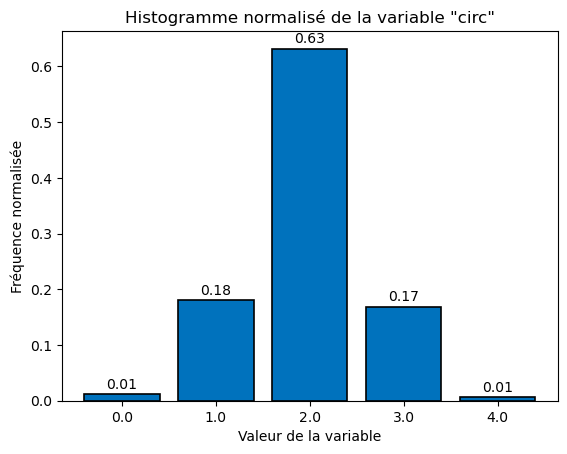

In [18]:
# Etude de la colonne : circ = régime de circulation

df_lieux['circ'] = df_lieux['circ'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
circ_values = df_lieux['circ'].dropna().unique()
circ_values.sort()
print(f"Valeurs triées de la variable 'circ': {circ_values}")

circ_freq = df_lieux['circ'].dropna().value_counts(normalize=True)
circ_freq = circ_freq[circ_values]

fig, ax = plt.subplots()
ax.bar(circ_values, circ_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "circ"')

ax.set_xticks(circ_values)
ax.set_xticklabels(circ_values)

for i, freq in enumerate(circ_freq):
    ax.text(circ_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé, on garde

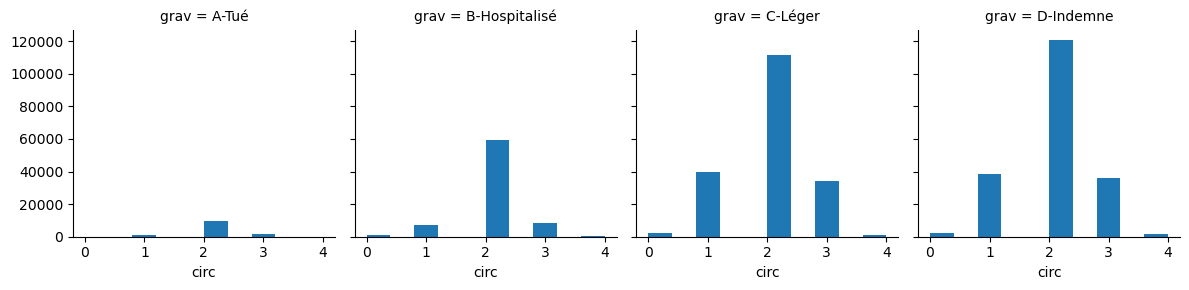

In [19]:
g_circ = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_circ.map(plt.hist, 'circ');

In [ ]:
# nbv = Nombre total de voies de circulation
# Il y a du zéro voie, ce qui peut être un parking par exemple.
# Au dela de 8 voies, la représentation est quasi-inexistante, on regroupe 9 voies et plus en : 9

Valeurs triées de la variable 'nbv': [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


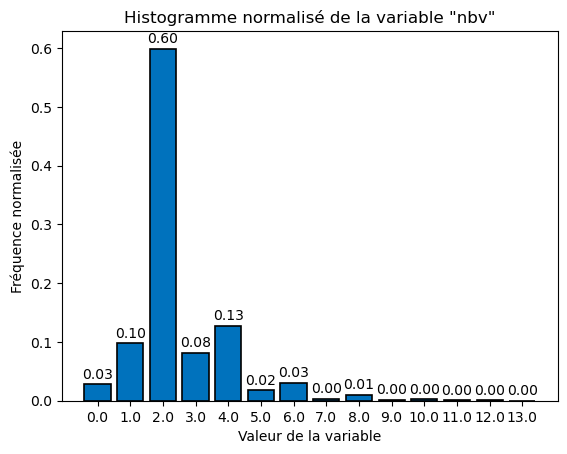

In [20]:
# Etude de la colonne : nbv = nombre de voies

df_lieux['nbv'] = df_lieux['nbv'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
nbv_values = df_lieux['nbv'].dropna().unique()
nbv_values.sort()
print(f"Valeurs triées de la variable 'nbv': {nbv_values}")

nbv_freq = df_lieux['nbv'].dropna().value_counts(normalize=True)
nbv_freq = nbv_freq[nbv_values]

fig, ax = plt.subplots()
ax.bar(nbv_values, nbv_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "nbv"')

ax.set_xticks(nbv_values)
ax.set_xticklabels(nbv_values)

for i, freq in enumerate(nbv_freq):
    ax.text(nbv_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé, on garde (même si un doute persiste sur le nombre de voies)

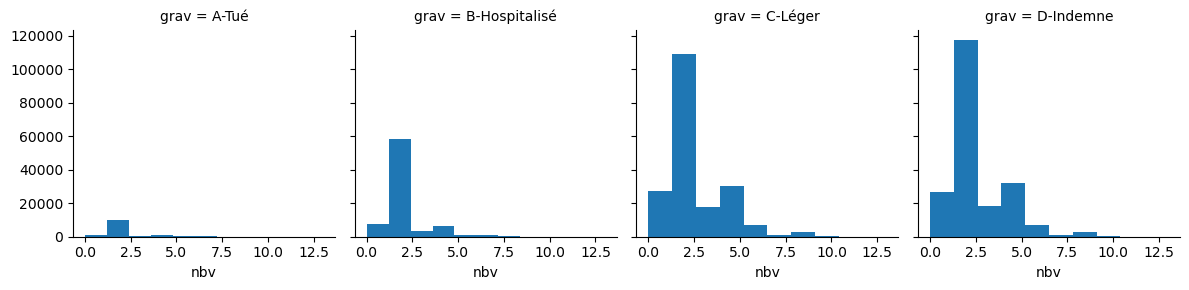

In [21]:
g_nbv = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_nbv.map(plt.hist, 'nbv');

In [ ]:
# # Pour Traitement de preprocessing : regroupement
# df_lieux['nbv'].replace([10, 11, 12, 13], 9, inplace=True)

In [ ]:
# Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur
# cette voie.
# -1 – Non renseigné
# 0 – Sans objet
# 1 – Piste cyclable
# 2 – Bande cyclable
# 3 – Voie réservée

# Pas de retraitement/regroupement nécessaire sur cette variable

Valeurs triées de la variable 'vosp': [0. 1. 2. 3.]


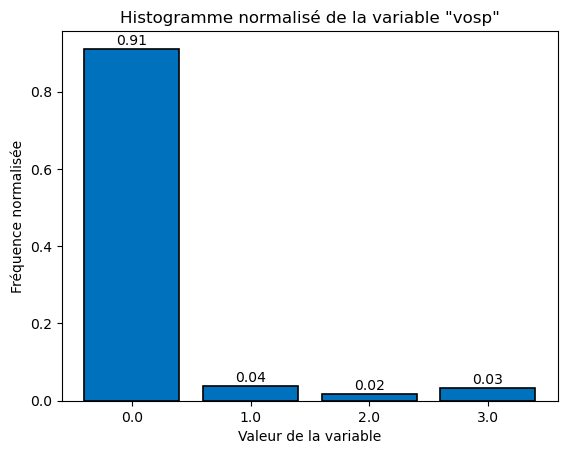

In [22]:
# Etude de la colonne : vosp = voies réservées

df_lieux['vosp'] = df_lieux['vosp'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
vosp_values = df_lieux['vosp'].dropna().unique()
vosp_values.sort()
print(f"Valeurs triées de la variable 'vosp': {vosp_values}")

vosp_freq = df_lieux['vosp'].dropna().value_counts(normalize=True)
vosp_freq = vosp_freq[vosp_values]

fig, ax = plt.subplots()
ax.bar(vosp_values, vosp_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "vosp"')

ax.set_xticks(vosp_values)
ax.set_xticklabels(vosp_values)

for i, freq in enumerate(vosp_freq):
    ax.text(vosp_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé. L'absence de voies (0) est majoritaire.

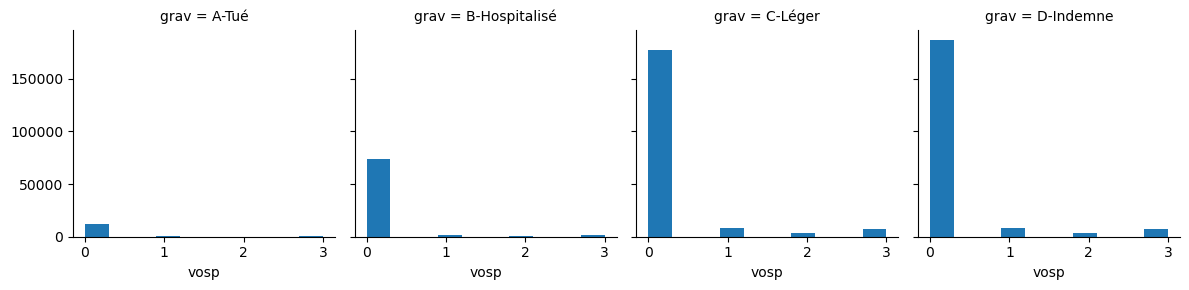

In [23]:
g_vosp = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_vosp.map(plt.hist, 'vosp');

In [ ]:
# Profil en long décrit la déclivité de la route à l'endroit de l'accident :
# -1 – Non renseigné
# 1 – Plat
# 2 – Pente
# 3 – Sommet de côte
# 4 – Bas de côte

# Curieusement nous avons des zéros pour cette variable alors que cela n'est pas renseigné dans la doc
# Pas de retraitement/regroupement nécessaire sur cette variable

Valeurs triées de la variable 'prof': [0. 1. 2. 3. 4.]


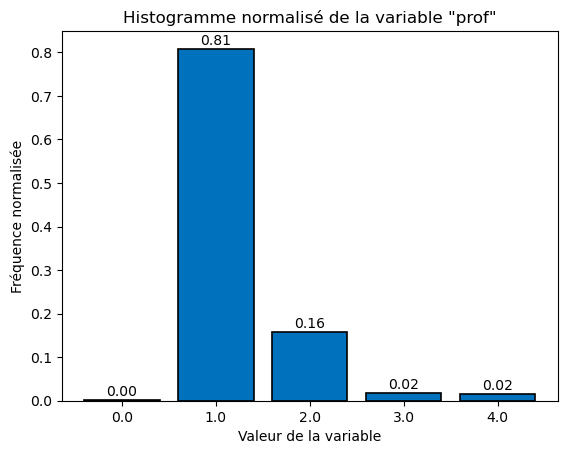

In [24]:
# Etude de la colonne : prof = profil de la route

df_lieux['prof'] = df_lieux['prof'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
prof_values = df_lieux['prof'].dropna().unique()
prof_values.sort()
print(f"Valeurs triées de la variable 'prof': {prof_values}")

prof_freq = df_lieux['prof'].dropna().value_counts(normalize=True)
prof_freq = prof_freq[prof_values]

fig, ax = plt.subplots()
ax.bar(prof_values, prof_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "prof"')

ax.set_xticks(prof_values)
ax.set_xticklabels(prof_values)

for i, freq in enumerate(prof_freq):
    ax.text(prof_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé. Le profil "plat" (1) est majoritaire.

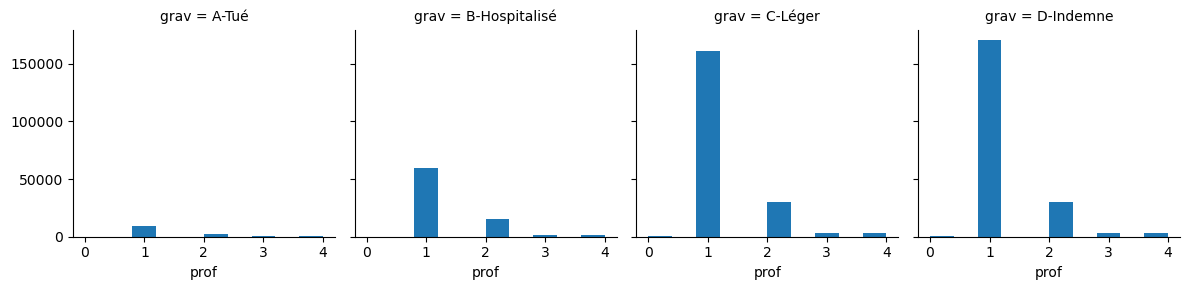

In [25]:
g_prof = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_prof.map(plt.hist, 'prof');

In [ ]:
# plan = Tracé en plan :
# -1 – Non renseigné
# 1 – Partie rectiligne
# 2 – En courbe à gauche
# 3 – En courbe à droite
# 4 – En « S »

# Curieusement nous avons des zéros pour cette variable alors que cela n'est pas renseigné dans la doc
# Pas de retraitement/regroupement nécessaire sur cette variable

Valeurs triées de la variable 'plan': [0. 1. 2. 3. 4.]


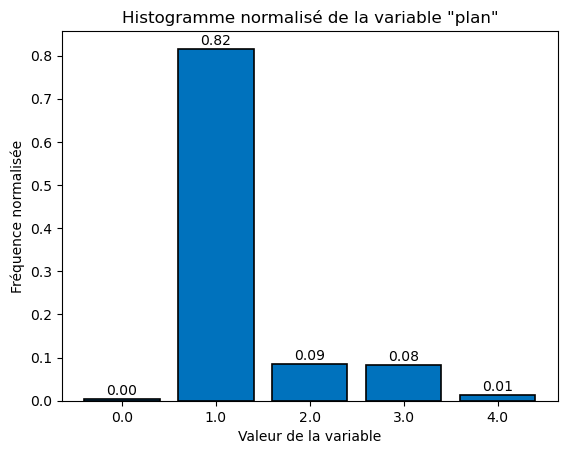

In [26]:
# Etude de la colonne : plan = tracé en plan

df_lieux['plan'] = df_lieux['plan'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
plan_values = df_lieux['plan'].dropna().unique()
plan_values.sort()
print(f"Valeurs triées de la variable 'plan': {plan_values}")

plan_freq = df_lieux['plan'].dropna().value_counts(normalize=True)
plan_freq = plan_freq[plan_values]

fig, ax = plt.subplots()
ax.bar(plan_values, plan_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "plan"')

ax.set_xticks(plan_values)
ax.set_xticklabels(plan_values)

for i, freq in enumerate(plan_freq):
    ax.text(plan_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé. Le plan "rectiligne" (1) est majoritaire.

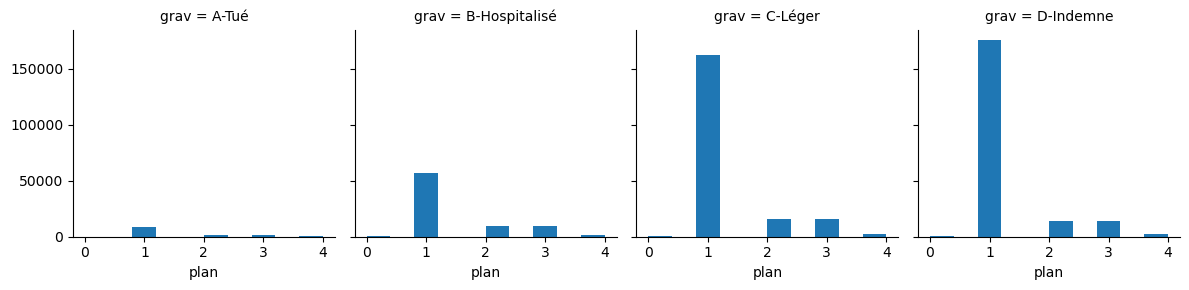

In [27]:
g_plan = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_plan.map(plt.hist, 'plan');

In [ ]:
# surf = Etat de la surface
# -1 – Non renseigné
# 1 – Normale
# 2 – Mouillée
# 3 – Flaques
# 4 – Inondée
# 5 – Enneigée
# 6 – Boue
# 7 – Verglacée
# 8 – Corps gras – huile
# 9 – Autre



Valeurs triées de la variable 'surf': [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


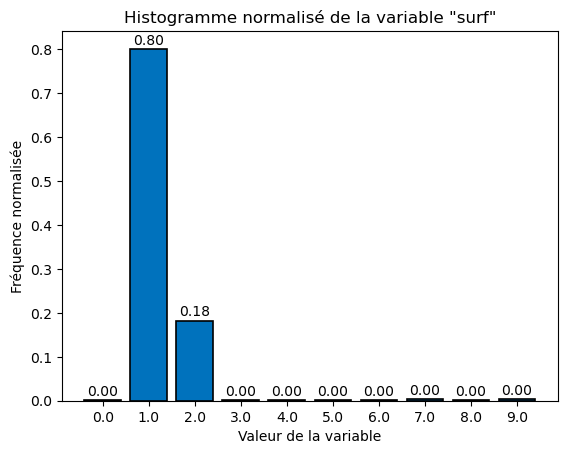

In [28]:
# Etude de la colonne : surf = état de la surface

df_lieux['surf'] = df_lieux['surf'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
surf_values = df_lieux['surf'].dropna().unique()
surf_values.sort()
print(f"Valeurs triées de la variable 'surf': {surf_values}")

surf_freq = df_lieux['surf'].dropna().value_counts(normalize=True)
surf_freq = surf_freq[surf_values]

fig, ax = plt.subplots()
ax.bar(surf_values, surf_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "surf"')

ax.set_xticks(surf_values)
ax.set_xticklabels(surf_values)

for i, freq in enumerate(surf_freq):
    ax.text(surf_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()


# C'est propre et bien catégorisé. La surface "mouilléee" (1) est très majoritaire, suivi de flaques (2)

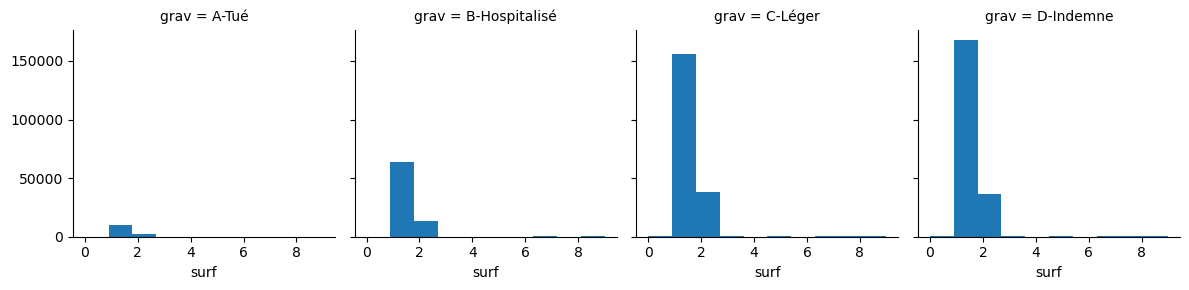

In [29]:
g_surf = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_surf.map(plt.hist, 'surf');

In [ ]:
# # Pour Traitement de preprocessing : regroupement
# df_lieux['surf'].replace([0, 4, 5, 6, 7, 8, 9], 3, inplace=True)
# 3 devenant : autre

In [ ]:
# infra = Aménagement - Infrastructure :
# -1 – Non renseigné
# 0 – Aucun
# 1 – Souterrain - tunnel
# 2 – Pont - autopont
# 3 – Bretelle d’échangeur ou de raccordement
# 4 – Voie ferrée
# 5 – Carrefour aménagé
# 6 – Zone piétonne
# 7 – Zone de péage
# 8 – Chantier
# 9 – Autres

# (0) Aucune infrastructure domine, mais les autres valeurs ne sont pas négligeables. On laisse tel quel.

Valeurs triées de la variable 'infra': [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


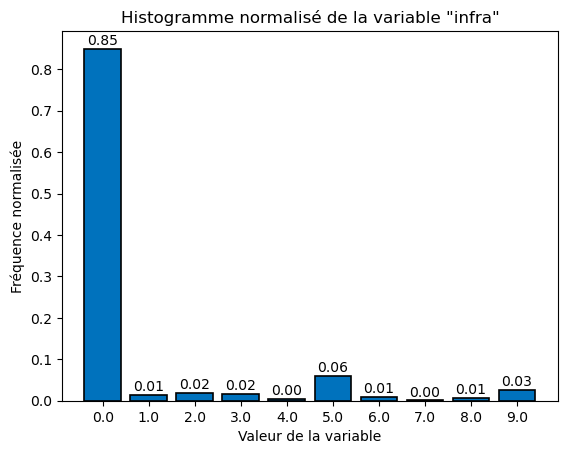

In [30]:
# Etude de la colonne : infra = Infrastructure

df_lieux['infra'] = df_lieux['infra'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
infra_values = df_lieux['infra'].dropna().unique()
infra_values.sort()
print(f"Valeurs triées de la variable 'infra': {infra_values}")

infra_freq = df_lieux['infra'].dropna().value_counts(normalize=True)
infra_freq = infra_freq[infra_values]

fig, ax = plt.subplots()
ax.bar(infra_values, infra_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "infra"')

ax.set_xticks(infra_values)
ax.set_xticklabels(infra_values)

for i, freq in enumerate(infra_freq):
    ax.text(infra_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé. On note que "aucun" (0) est très majoritaire

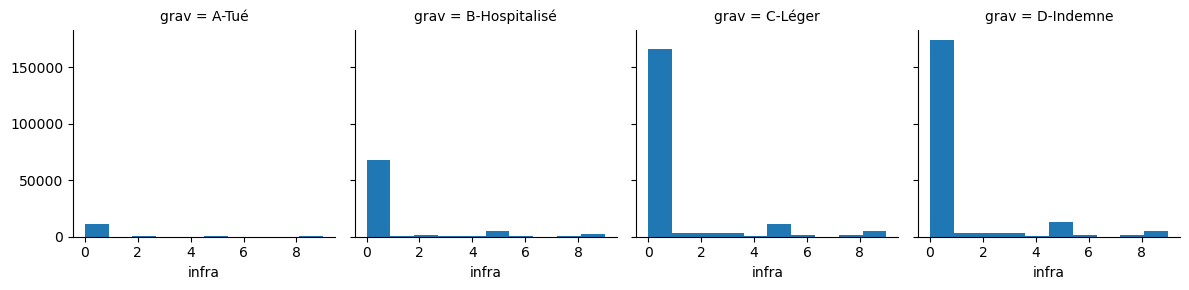

In [31]:
g_infra = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_infra.map(plt.hist, 'infra');

In [ ]:
# situ = Situation de l’accident :
# -1 – Non renseigné
# 0 – Aucun
# 1 – Sur chaussée
# 2 – Sur bande d’arrêt d’urgence
# 3 – Sur accotement
# 4 – Sur trottoir
# 5 – Sur piste cyclable
# 6 – Sur autre voie spéciale
# 8 – Autres

# # (1) Aucune infrastructure domine, mais les autres valeurs ne sont pas négligeables. On laisse tel quel.

Valeurs triées de la variable 'situ': [0. 1. 2. 3. 4. 5. 6. 8.]


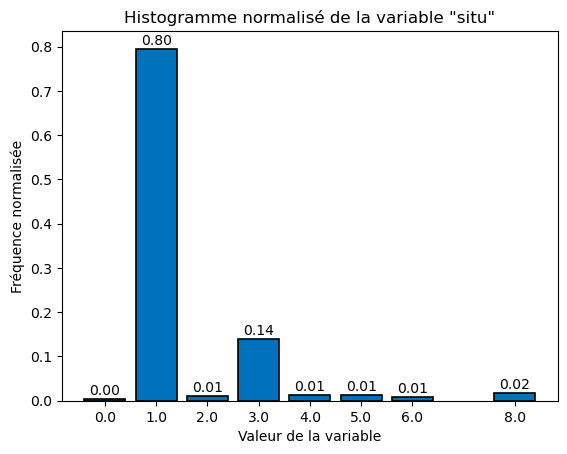

In [32]:
# Etude de la colonne : situ = Situation de l'accident

df_lieux['situ'] = df_lieux['situ'].replace(-1, np.nan) # On transforme les -1 en nan

# Attention pour tracer le graphique, je supprime les nan qui sont donc exclus de la normalisation
situ_values = df_lieux['situ'].dropna().unique()
situ_values.sort()
print(f"Valeurs triées de la variable 'situ': {situ_values}")

situ_freq = df_lieux['situ'].dropna().value_counts(normalize=True)
situ_freq = situ_freq[situ_values]

fig, ax = plt.subplots()
ax.bar(situ_values, situ_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "situ"')

ax.set_xticks(situ_values)
ax.set_xticklabels(situ_values)

for i, freq in enumerate(situ_freq):
    ax.text(situ_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

# C'est propre et bien catégorisé. La situation "chaussée" (1) est très majoritaire, suivi de "sur accotement" (3)

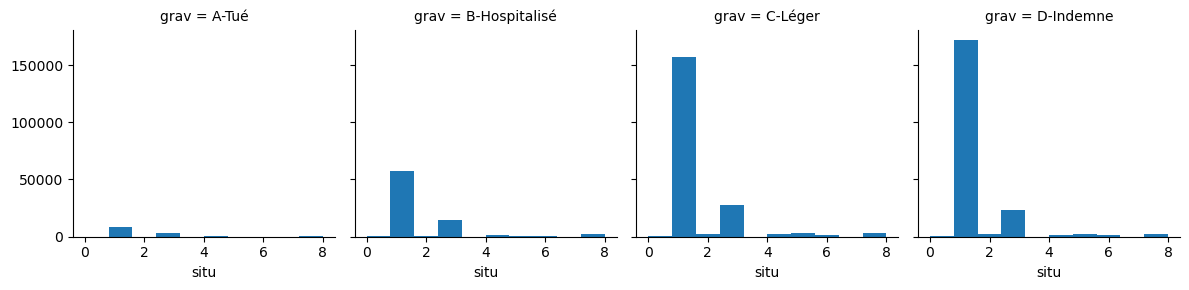

In [33]:
g_situ = sns.FacetGrid(df_lieux, col='grav', col_order=grav_order)
g_situ.map(plt.hist, 'situ');

In [ ]:
# Etude de la colonne : vma = vitesse maximale autorisée

In [34]:
df_vma = df_lieux.loc[:, ["vma", "an", "grav", "count"]]                   # On ne conserve que vma, an et la target grav
df_vma['an'] = df_vma['an'].astype(str).replace('18', '2018')              # On corrige 18 en 2018
df_nan_count = df_vma.groupby('an')['vma'].apply(lambda x: x.isna().sum()) # On compte les nan > tous en 2018
df_nan_count.head(20)

an
2018    130169
2019         0
2020         0
2021         0
Name: vma, dtype: int64

In [35]:
df_vma.drop(df_vma[df_vma['an'] == '2018'].index, inplace=True)         # On supprime les lignes 2018
df_vma.head()

,vma,an,grav,count
130169,70.0,2019,C-Léger,1
130170,70.0,2019,C-Léger,1
130171,70.0,2019,D-Indemne,1
130172,70.0,2019,C-Léger,1
130173,90.0,2019,D-Indemne,1


In [36]:
df_nan_count = df_vma.groupby('an')['vma'].apply(lambda x: x.isna().sum()) # On vérifie
df_nan_count.head(20)

an
2019    0
2020    0
2021    0
Name: vma, dtype: int64

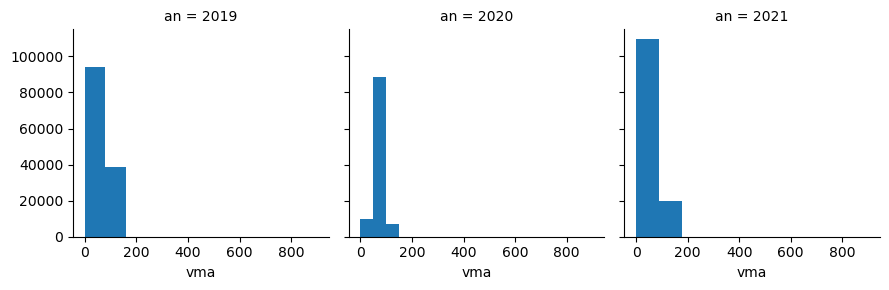

In [37]:
g_vma = sns.FacetGrid(df_vma, col='an')
g_vma.map(plt.hist, 'vma');

In [38]:
df_vma['vma'].unique()

array([ 70.,  90.,  30.,  50.,  80.,  60.,  10., 110.,  20.,  -1., 130.,
        15.,   5.,  40.,   3.,   4.,   1.,   0.,  45.,  25.,   2., 500.,
       100.,  65.,  12., 120.,  35.,   6., 560.,   7., 700., 800.,  42.,
       600.,  55.,   8., 300., 900., 520., 180.,  75., 901.,   9., 501.,
       502., 770., 140.])

In [39]:
df_vma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367365 entries, 130169 to 497593
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   vma     367365 non-null  float64
 1   an      367365 non-null  object 
 2   grav    367365 non-null  object 
 3   count   367365 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 14.0+ MB


In [40]:
# On supprime les lignes ou la vitesse > 130 et < 25 pour compenser les erreurs de saisie
df_vma.drop(df_vma[(df_vma['vma'] > 130) | (df_vma['vma'] < 30)].index, inplace=True)
df_vma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359751 entries, 130169 to 497593
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   vma     359751 non-null  float64
 1   an      359751 non-null  object 
 2   grav    359751 non-null  object 
 3   count   359751 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 13.7+ MB


In [41]:
df_vma.head() 

,vma,an,grav,count
130169,70.0,2019,C-Léger,1
130170,70.0,2019,C-Léger,1
130171,70.0,2019,D-Indemne,1
130172,70.0,2019,C-Léger,1
130173,90.0,2019,D-Indemne,1


In [42]:
frequence =  df_vma.groupby('vma')['count'].sum()

In [43]:
frequence

vma
30.0      29450
35.0         28
40.0        289
42.0          4
45.0        126
50.0     196259
55.0          3
60.0       1107
65.0          5
70.0      27607
75.0          3
80.0      52896
90.0      27219
100.0        67
110.0     15263
120.0         2
130.0      9423
Name: count, dtype: int64

In [44]:
df_vma = df_vma[~df_vma['vma'].isin([1, 35, 40, 42, 45, 55, 65, 75, 100, 120])]   # On supprime une liste
# Voir plustôt pour regrouper

In [45]:
df_vma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359224 entries, 130169 to 497593
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   vma     359224 non-null  float64
 1   an      359224 non-null  object 
 2   grav    359224 non-null  object 
 3   count   359224 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 13.7+ MB


Valeurs triées de la variable 'vma': [ 30.  50.  60.  70.  80.  90. 110. 130.]


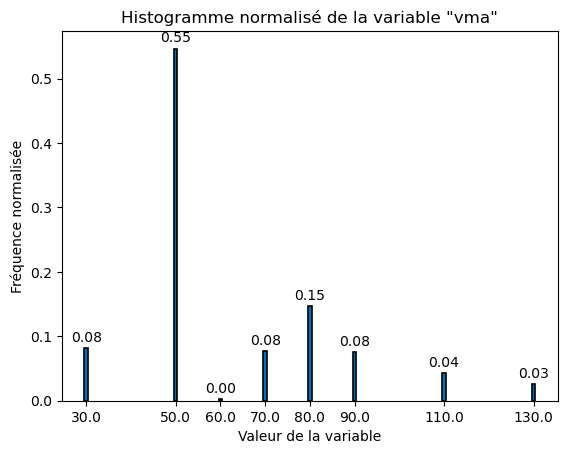

In [46]:
# Etude de la colonne : vma = vitesse maximale autorisée

vma_values = df_vma['vma'].unique()
vma_values.sort()
print(f"Valeurs triées de la variable 'vma': {vma_values}")

vma_freq = df_vma['vma'].value_counts(normalize=True)
vma_freq = vma_freq[vma_values]

fig, ax = plt.subplots()
ax.bar(vma_values, vma_freq, color='#0072BD', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Valeur de la variable')
ax.set_ylabel('Fréquence normalisée')
ax.set_title('Histogramme normalisé de la variable "vma"')

ax.set_xticks(vma_values)
ax.set_xticklabels(vma_values)

for i, freq in enumerate(vma_freq):
    ax.text(vma_values[i], freq+0.01, f"{freq:.2f}", ha='center')

plt.show()

In [ ]:
# On peut noter que 63% des accidents on lieux à une vitesse <= 50 km/h, donc en agglomération.

In [47]:
# On recatégorise > Discussion à ouvrir Agglo / ND / Autoroute

df_vma.loc[df_vma['vma'] <= 50, 'vmaa'] = 'Agglo'
df_vma.loc[df_vma['vma'] > 50, 'vmaa'] = 'Hors-Agglo'

C:\Users\Jerome\AppData\Local\Temp\ipykernel_21612\2674971342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vma.loc[df_vma['vma'] <= 50, 'vmaa'] = 'Agglo'


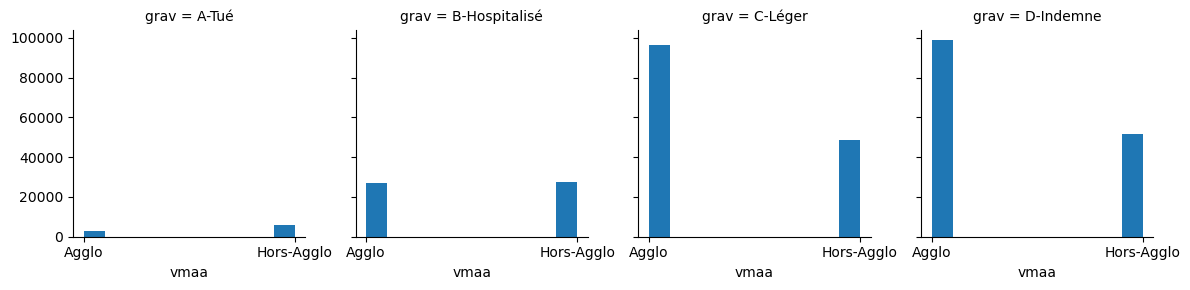

In [48]:
g_vmaa = sns.FacetGrid(df_vma, col='grav', col_order=grav_order)
g_vmaa.map(plt.hist, 'vmaa');

In [49]:
# Au final on abandonne vma
df_lieux.drop(['vma'], axis=1, inplace=True)


In [50]:
# Nettoyage de l'année et du compteur
df_lieux.drop(['an', 'count'], axis=1, inplace=True)

In [ ]:
# Cette variable est mal renseignée, elle doit être recatégorisée en Agglo/Hors agglo ou 
# en Agglo/ Nationale + Départementale / Autoroute. Ce qui fait doublon avec les variables existantes : 
# agg (agglomération) et catr (catégorie de route) plus précises et mieux renseignées. 
# Or vma apporte 26% de nan à cause de 2018 > On abandonne cette variable.

## Test du Khi 2

In [51]:
from scipy.stats import chi2_contingency

In [52]:
# Etude des variables conservées VS gravité

df_catr = pd.crosstab(df_lieux.catr, df_lieux.grav)
df_circ = pd.crosstab(df_lieux.circ, df_lieux.grav)
df_nbv = pd.crosstab(df_lieux.nbv, df_lieux.grav)
df_vosp = pd.crosstab(df_lieux.vosp, df_lieux.grav)
df_prof = pd.crosstab(df_lieux.prof, df_lieux.grav)
df_plan = pd.crosstab(df_lieux.plan, df_lieux.grav)
df_surf = pd.crosstab(df_lieux.surf, df_lieux.grav)
df_infra = pd.crosstab(df_lieux.infra, df_lieux.grav)
df_situ = pd.crosstab(df_lieux.situ, df_lieux.grav)

In [53]:
# Test du chi2 pour chaque variable

catr_chi2, catr_p, catr_dof, catr_expected = chi2_contingency(df_catr)
circ_chi2, circ_p, circ_dof, circ_expected = chi2_contingency(df_circ)
nbv_chi2, nbv_p, nbv_dof, nbv_expected = chi2_contingency(df_nbv)
vosp_chi2, vosp_p, vosp_dof, vosp_expected = chi2_contingency(df_vosp)
prof_chi2, prof_p, prof_dof, prof_expected = chi2_contingency(df_prof)
plan_chi2, plan_p, plan_dof, plan_expected = chi2_contingency(df_plan)
surf_chi2, surf_p, surf_dof, surf_expected = chi2_contingency(df_surf)
infra_chi2, infra_p, infra_dof, infra_expected = chi2_contingency(df_infra)
situ_chi2, situ_p, situ_dof, situ_expected = chi2_contingency(df_situ)

In [54]:
# Créer un dictionnaire contenant les valeurs
dic_catr = {'var': "catr", 'chi2': [catr_chi2], 'p-value': [catr_p], 'Degrees of freedom': [catr_dof]}
dic_circ = {'var': "cicr", 'chi2': [circ_chi2], 'p-value': [circ_p], 'Degrees of freedom': [circ_dof]}
dic_nbv = {'var': "nbv", 'chi2': [nbv_chi2], 'p-value': [nbv_p], 'Degrees of freedom': [nbv_dof]}
dic_vosp = {'var': "vosp", 'chi2': [vosp_chi2], 'p-value': [vosp_p], 'Degrees of freedom': [vosp_dof]}
dic_prof = {'var': "prof", 'chi2': [prof_chi2], 'p-value': [prof_p], 'Degrees of freedom': [prof_dof]}
dic_plan = {'var': "plan", 'chi2': [plan_chi2], 'p-value': [plan_p], 'Degrees of freedom': [plan_dof]}
dic_surf = {'var': "surf", 'chi2': [surf_chi2], 'p-value': [surf_p], 'Degrees of freedom': [surf_dof]}
dic_infra = {'var': "infra", 'chi2': [infra_chi2], 'p-value': [infra_p], 'Degrees of freedom': [infra_dof]}
dic_situ = {'var': "situ", 'chi2': [situ_chi2], 'p-value': [situ_p], 'Degrees of freedom': [situ_dof]}

# Création des dataframes
df1 = pd.DataFrame(dic_catr)
df2 = pd.DataFrame(dic_circ)
df3 = pd.DataFrame(dic_nbv)
df4 = pd.DataFrame(dic_vosp)
df5 = pd.DataFrame(dic_prof)
df6 = pd.DataFrame(dic_plan)
df7 = pd.DataFrame(dic_surf)
df8 = pd.DataFrame(dic_infra)
df9 = pd.DataFrame(dic_situ)

# Concaténation des dataFrames
df_chi2 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=0)

In [55]:
df_chi2 = df_chi2.sort_values(by='chi2', ascending=False)
df_chi2.head(10)

,var,chi2,p-value,Degrees of freedom
0,catr,18334.399116,0.000000e+00,21
0,nbv,11755.218696,0.000000e+00,39
0,cicr,10741.465251,0.000000e+00,12
0,situ,8078.438987,0.000000e+00,21
0,plan,7221.903785,0.000000e+00,12
0,prof,2196.000432,0.000000e+00,12
0,infra,1127.630529,2.013434e-220,27
0,vosp,1118.803779,4.064027e-235,9
0,surf,1104.907689,1.342242e-215,27


In [ ]:
# Toutes les variables ont une p-value nulle donc il y a bien corrélation avec la gravité pour chacune d'elle.
# La plus corrélées est catr et nbv, la moins corrélée est surf

## V de cramer

In [56]:
# Label encoding des variables catégorielles
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df_lieux.columns :
  data_encoded[i]=label.fit_transform(df_lieux[i])

In [57]:
data_encoded = data_encoded.drop("Num_Acc", axis=1)   # On supprime le numéro d'accident
data_encoded.head()

,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,grav
0,2,2,2,0,1,3,1,0,1,1
1,2,2,2,0,1,3,1,0,1,3
2,3,2,2,0,1,2,1,0,1,3
3,3,2,2,0,1,2,1,0,1,2
4,2,2,2,0,1,1,1,0,1,1


In [58]:
# V de Cramer
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [59]:
# Construction de la matrice

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

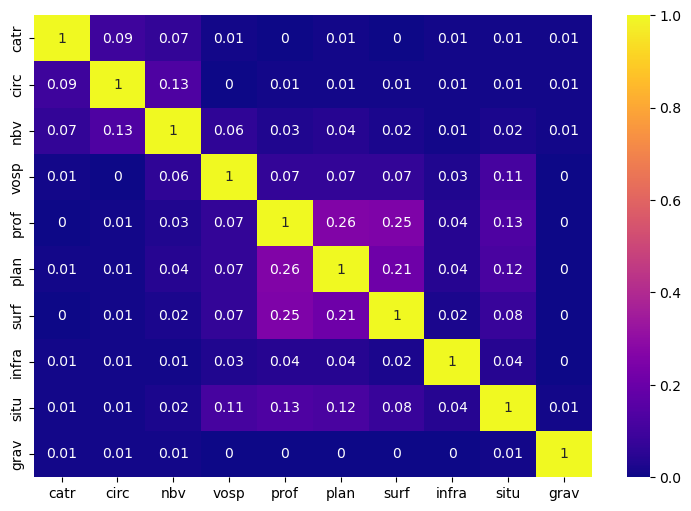

In [60]:
# Affichage de la heatmap
  
plt.figure(figsize=(9, 6))                              # taille de la figure
hm = sns.heatmap(data=df, annot=True, cmap='plasma')     # plotting the heatmap
  
plt.show()

## Pre-processing et cleaning